## Implementation of Correlation Analysis in Smart Contract Security Data
Welcome to this deep dive into correlation analysis for binary data in smart contract security! 🚀 In this notebook, I’ll walk you through calculating both the Phi coefficient and the Point-Biserial correlation, visualizing the results, and interpreting what these correlations reveal about the relationships between different risk tags in smart contract datasets.

## Objective
The goal here is to strengthen your ability to perform and understand advanced statistical analyses—an essential skill for making data-driven decisions in cybersecurity and beyond.

### Step 1: Import libraries

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import networkx as nx



# Ensure plots are displayed inline in the notebook
%matplotlib inline

print("Libraries imported successfully!")

Libraries imported successfully!


### Step 2: Download the dataset

This step would download the Webacy Smart Contract Risk dataset. If you have your own dataset, then please add it to colab's environment.

In [2]:
!gdown 1andAuermOWqVXfhsh_AQ3Db93D3BIqgx

Downloading...
From: https://drive.google.com/uc?id=1andAuermOWqVXfhsh_AQ3Db93D3BIqgx
To: /content/compiled_risk_data.xlsx
100% 294k/294k [00:00<00:00, 64.7MB/s]


In [ ]:
print("Setup complete. Imported pandas, seaborn, and matplotlib. Downloaded Webacy risk dataset.")

### Step 3: Load the Data Section

Now even though we have downloaded the dataset, we still need to load it into our Python environment. For this we will utilize the Pandas library.

In [3]:
# Loading the dataset

df = pd.read_excel('compiled_risk_data.xlsx')

# Display the first five rows of the dataframe
df.head()

,project_name,Smart contract address,Blog post link,Audit website,Chain,Is_closed_source,hidden_owner,anti_whale_modifiable,Is_anti_whale,Is_honeypot,...,centralized_risk_high,centralized_risk_low,event_setter,external_dependencies,immutable_states,reentrancy_without_eth_transfer,incorrect_inheritance_order,shadowing_local,events_maths,Summary/rationale of risk tags marked true
0,Data Analytics,: 0e95242dceab8815a44767f6ef2b20a693765e56,https://hacken.io/research/,https://hacken.io/audits/sock/,Ethereum,False,False,False,False,False,...,0.0,0.0,False,True,True,False,False,False,False,exploitation was the risk tag that was marked ...
1,Data Analytics,00x47ac3527d02e6b9631c77fad1cdee7bfa77a8a7bfd4...,https://hacken.io/discover/euler-finance-hack/,https://hacken.io/research/,Ethereum,False,False,False,False,False,...,0.0,0.0,False,False,False,False,False,False,False,The risk tags marked as true for the Euler Fin...
2,Data Analytics,0154676f95a510a855622f8ac9b07816f94edf08,https://consensys.io/diligence/audits/2024/01/...,https://consensys.io/diligence/audits/2024/01/...,Ethereum,False,False,False,True,False,...,0.0,0.0,False,True,False,False,False,False,False,The Linea smart contracts exhibit several inhe...
3,Data Analytics,01b5f3e0a5f7b9eb7af742aa8dd9ada2b6ec00cd,https://chainsecurity.com/wp-content/uploads/2...,https://chainsecurity.com/security-audit/polyg...,Polygon,False,False,False,False,False,...,0.0,0.0,False,False,False,False,False,False,False,Since all the options are marked as False base...
4,Data Analytics,02339dfda0f3caabad142060d511d10bfe93c520,https://chainsecurity.com/security-audit/limit...,https://chainsecurity.com/smart-contract-audit...,Ethereum,False,False,False,False,False,...,0.0,0.0,False,False,True,False,False,False,False,The selfdestruct risk tag was marked as true b...


## Calculate Correlation

To calculate the Phi coefficient, which is suitable for pairs of binary variables, we first need to establish a function that can handle this calculation:

In [4]:
def phi_coefficient(x, y):
    """Calculate the Phi coefficient for two binary variables."""
    # Create a contingency table
    contingency_table = pd.crosstab(x, y)
    # Calculate the phi coefficient from the contingency table
    chi2 = scipy.stats.chi2_contingency(contingency_table, correction=False)[0]
    n = np.sum(np.sum(contingency_table))
    phi = np.sqrt(chi2 / n)
    return phi

# Example calculation between two risk tags
phi = phi_coefficient(df['Is_honeypot'], df['anti_whale_modifiable'])
print(f"Phi Coefficient between 'Is_honeypot' and 'anti_whale_modifiable': {phi}")

Phi Coefficient between 'Is_honeypot' and 'anti_whale_modifiable': 0.4437039256424274


/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


Phi value close to 0 indicates no correlation between the two columns.

**Note:** Phi values range from -1 to 1. A negative value of Phi indicates that the variables are inversely related, or when one variable increases, the other decreases. On the other hand, positive values indicate that when one variable increases, so does the other.

Let's now define the risk columns of our dataset.

In [5]:
risk_columns = ['Is_closed_source', 'hidden_owner', 'anti_whale_modifiable',
       'Is_anti_whale', 'Is_honeypot', 'buy_tax', 'sell_tax',
       'slippage_modifiable', 'Is_blacklisted', 'can_take_back_ownership',
       'owner_change_balance', 'is_airdrop_scam', 'selfdestruct', 'trust_list',
       'is_whitelisted', 'is_fake_token', 'illegal_unicode', 'exploitation',
       'bad_contract', 'reusing_state_variable', 'encode_packed_collision',
       'encode_packed_parameters', 'centralized_risk_medium',
       'centralized_risk_high', 'centralized_risk_low', 'event_setter',
       'external_dependencies', 'immutable_states',
       'reentrancy_without_eth_transfer', 'incorrect_inheritance_order',
       'shadowing_local', 'events_maths']

Now we will calculate the phi coefficient for all the columns

In [6]:
risk_df = df[risk_columns]

# Create a DataFrame to store Phi coefficients
phi_matrix = pd.DataFrame(index=risk_df.columns, columns=risk_df.columns)

# Calculate Phi coefficient for each pair of binary variables
for var1 in risk_df.columns:
    for var2 in risk_df.columns:
        phi_matrix.loc[var1, var2] = phi_coefficient(risk_df[var1], risk_df[var2])

print("Phi coefficients calculated for all pairs of variables:")
phi_matrix


/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/

Phi coefficients calculated for all pairs of variables:


/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/

,Is_closed_source,hidden_owner,anti_whale_modifiable,Is_anti_whale,Is_honeypot,buy_tax,sell_tax,slippage_modifiable,Is_blacklisted,can_take_back_ownership,...,centralized_risk_medium,centralized_risk_high,centralized_risk_low,event_setter,external_dependencies,immutable_states,reentrancy_without_eth_transfer,incorrect_inheritance_order,shadowing_local,events_maths
Is_closed_source,1.0,0.369825,0.343793,0.315152,0.395294,0.321812,0.387156,0.395293,0.338371,0.271559,...,0.155005,0.217354,0.222421,0.360043,0.132648,0.275936,0.249433,0.342951,0.369848,0.30473
hidden_owner,0.369825,1.0,0.371578,0.356021,0.328014,0.454177,0.422091,0.418828,0.299462,0.372939,...,0.204905,0.332364,0.207183,0.302669,0.129919,0.228094,0.262604,0.335381,0.299793,0.190843
anti_whale_modifiable,0.343793,0.371578,1.0,0.536006,0.443704,0.460264,0.523498,0.625441,0.33861,0.339978,...,0.231735,0.346207,0.180772,0.374556,0.185268,0.300558,0.309001,0.36614,0.411167,0.303052
Is_anti_whale,0.315152,0.356021,0.536006,1.0,0.371245,0.501367,0.513153,0.507013,0.342278,0.281739,...,0.219838,0.294004,0.199763,0.336262,0.170635,0.383476,0.274457,0.34901,0.385632,0.296332
Is_honeypot,0.395294,0.328014,0.443704,0.371245,1.0,0.386469,0.414324,0.389585,0.478634,0.287442,...,0.19187,0.224287,0.275755,0.367158,0.212279,0.387316,0.31973,0.45656,0.440523,0.358995
buy_tax,0.321812,0.454177,0.460264,0.501367,0.386469,1.0,0.710463,0.444537,0.339422,0.326003,...,0.239542,0.291784,0.220048,0.288925,0.157569,0.359325,0.255471,0.354019,0.38716,0.290881
sell_tax,0.387156,0.422091,0.523498,0.513153,0.414324,0.710463,1.0,0.465644,0.381907,0.272188,...,0.291278,0.310494,0.23208,0.328965,0.179746,0.354068,0.337649,0.328301,0.42844,0.295159
slippage_modifiable,0.395293,0.418828,0.625441,0.507013,0.389585,0.444537,0.465644,1.0,0.285621,0.362606,...,0.237516,0.329007,0.244272,0.384301,0.206749,0.315036,0.346361,0.346984,0.415881,0.327842
Is_blacklisted,0.338371,0.299462,0.33861,0.342278,0.478634,0.339422,0.381907,0.285621,1.0,0.244082,...,0.157359,0.333584,0.177963,0.36036,0.185408,0.29712,0.26178,0.378526,0.432002,0.296575
can_take_back_ownership,0.271559,0.372939,0.339978,0.281739,0.287442,0.326003,0.272188,0.362606,0.244082,1.0,...,0.243507,0.36217,0.216989,0.292306,0.136021,0.303422,0.223104,0.354918,0.311808,0.241693


Now even though we have the full correlation matrix in front of us, it is very difficult to visualize. One thing that we can do is only display those correlations where value is significantly positive or negative.

But a much better way is to visualize this matrix as a heatmap.

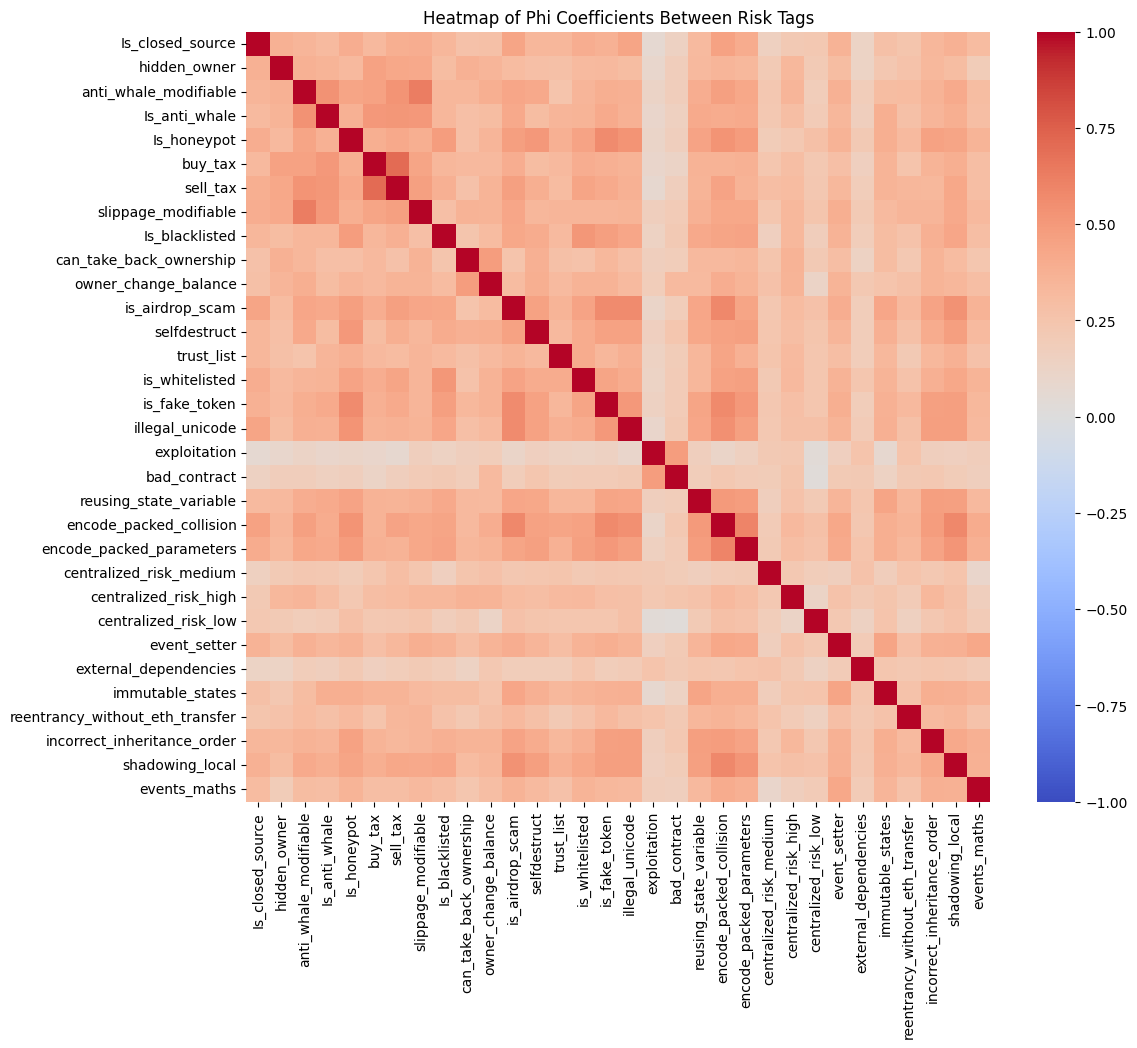

In [7]:
# Setting the size of the plot
plt.figure(figsize=(12, 10))

# Creating a heatmap
sns.heatmap(phi_matrix.astype(float), annot=False, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap of Phi Coefficients Between Risk Tags')
plt.show()


You can experiment with a variety of versions of this heatmap to improve visibility of the trends

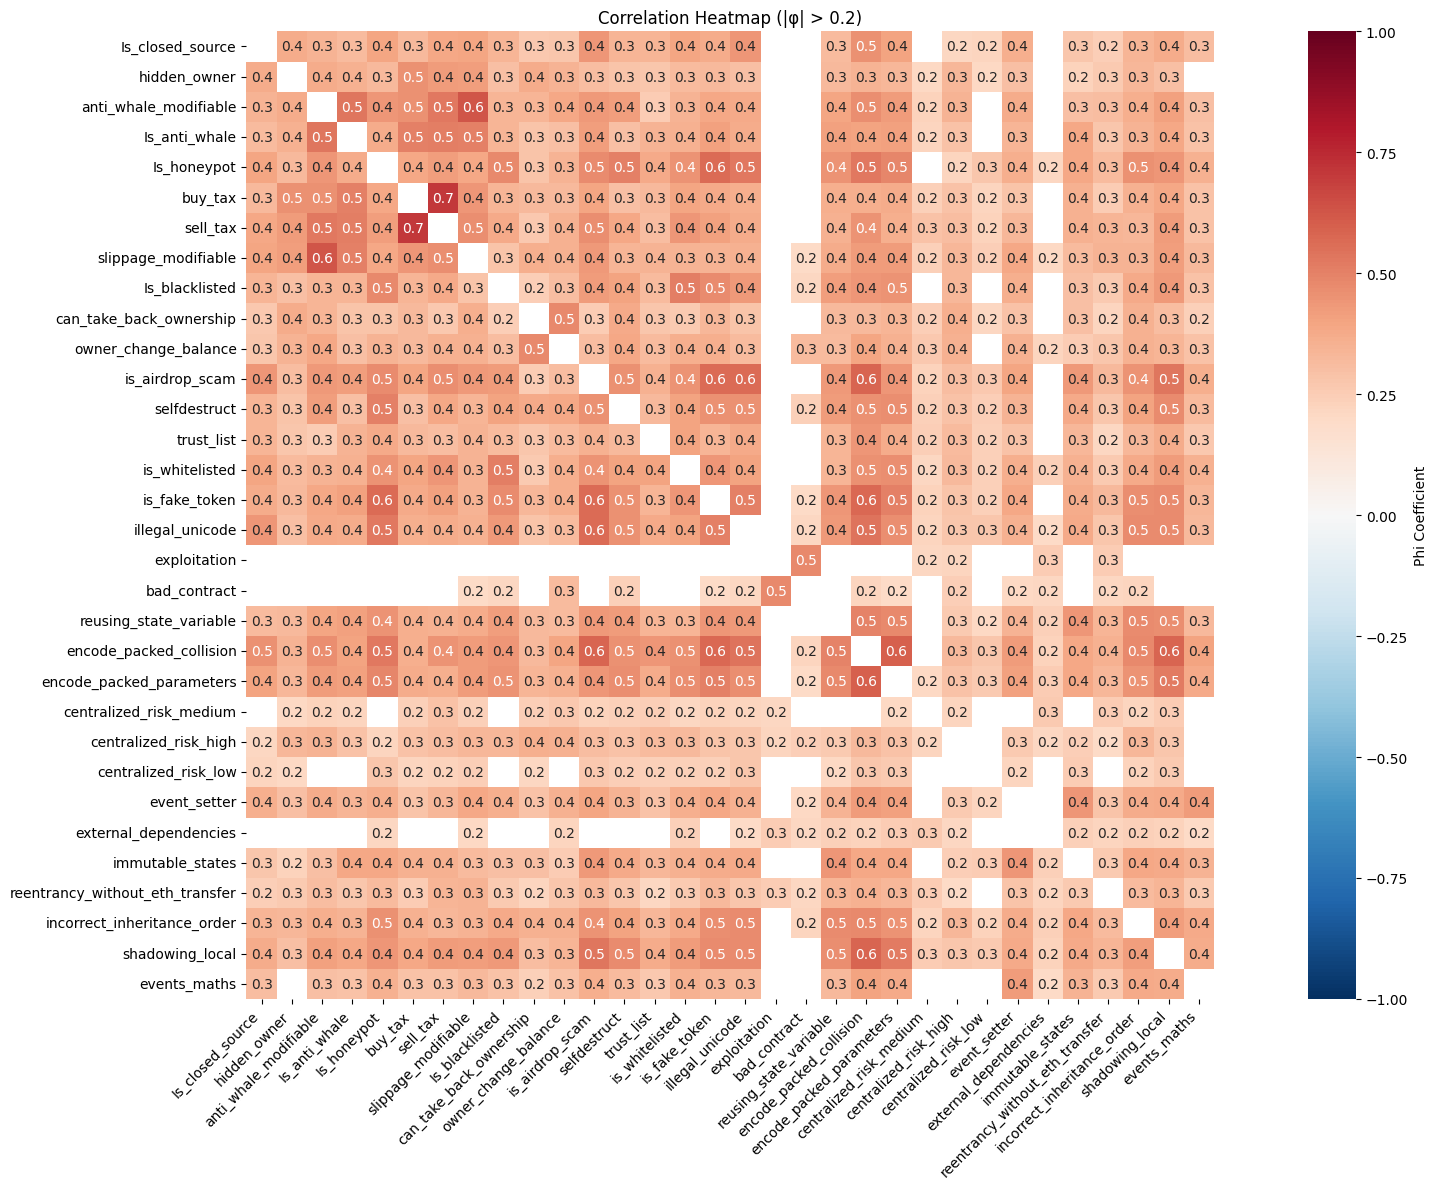

In [8]:
# Setting a figure shape
plt.figure(figsize=(19, 12))

# Creating a Filtered Heatmap
threshold=0.2 # set threshold

phi_matrix = phi_matrix.astype(float)

# Create mask for low correlations and diagonal
mask = np.abs(phi_matrix) < threshold
mask = mask.to_numpy()
np.fill_diagonal(mask, True)  # Hide diagonal

# Plot heatmap with improved formatting
sns.heatmap(phi_matrix,
            mask=mask,
            cmap='RdBu_r',
            vmin=-1,
            vmax=1,
            center=0,
            annot=True,
            fmt='.1f',
            square=True,
            cbar_kws={'label': 'Phi Coefficient'})

plt.title(f'Correlation Heatmap (|φ| > {threshold})')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [9]:
# Top Correlations Table
# Get upper triangle
upper_tri = phi_matrix.where(np.triu(np.ones(phi_matrix.shape), k=1).astype(bool))
stacked_corrs = upper_tri.stack()
strong_corrs = stacked_corrs[np.abs(stacked_corrs) > threshold]
strong_corrs = strong_corrs.sort_values(ascending=False)

print("\nTop Positive Correlations:")
print(strong_corrs[strong_corrs > 0].head(10))
print("\nTop Negative Correlations:")
print(strong_corrs[strong_corrs < 0].head(10))




Top Positive Correlations:
buy_tax                  sell_tax                    0.710463
anti_whale_modifiable    slippage_modifiable         0.625441
encode_packed_collision  encode_packed_parameters    0.600241
                         shadowing_local             0.581962
is_airdrop_scam          encode_packed_collision     0.578995
is_fake_token            encode_packed_collision     0.574627
is_airdrop_scam          is_fake_token               0.565093
                         illegal_unicode             0.565044
Is_honeypot              is_fake_token               0.562504
illegal_unicode          encode_packed_collision     0.544344
dtype: float64

Top Negative Correlations:
Series([], dtype: float64)


You can also use a network graph. Would recommend reducing the number of features here before using a network graph.

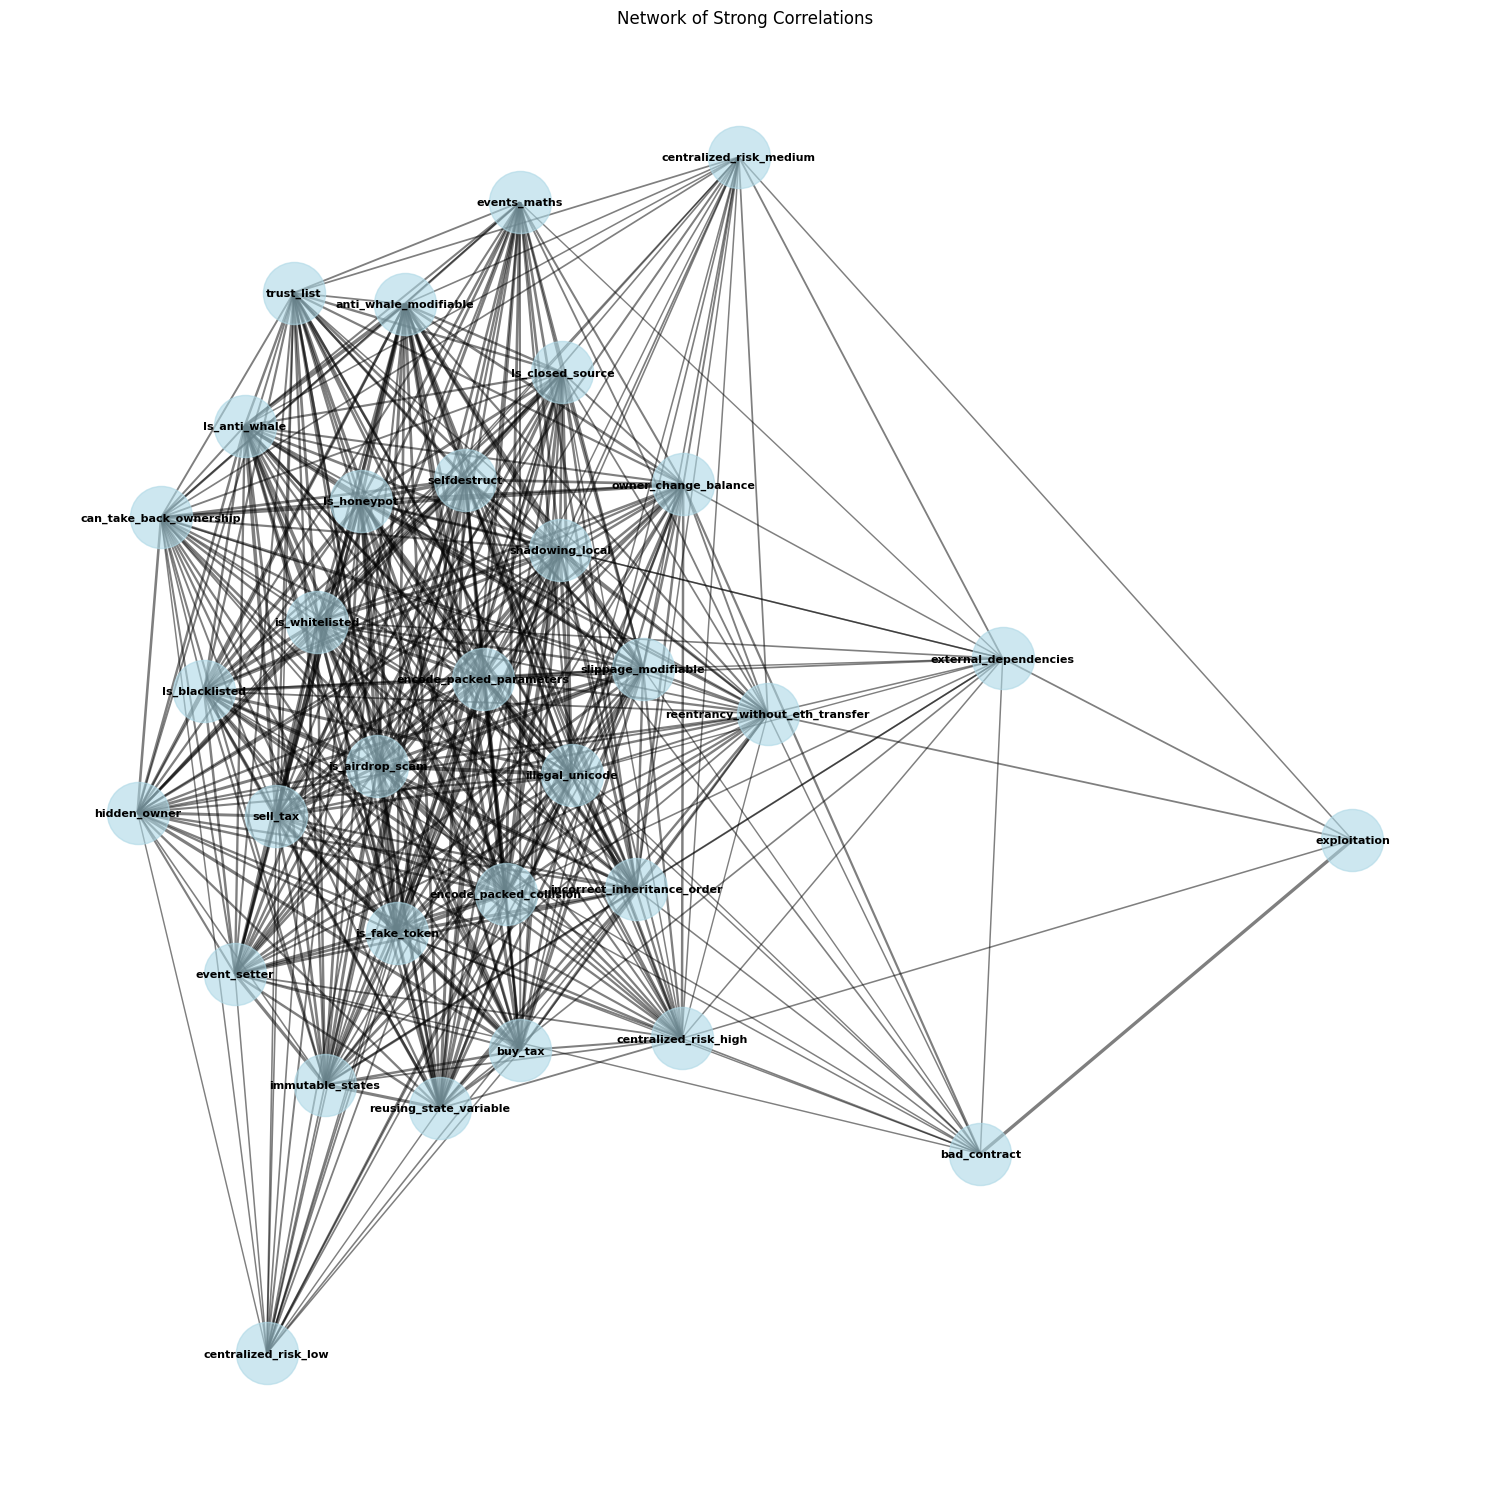

In [10]:
# Simplified Network Graph
plt.figure(figsize=(15, 15))
G = nx.Graph()

# Add edges for strong correlations
for i in range(len(phi_matrix.columns)):
    for j in range(i + 1, len(phi_matrix.columns)):
        corr = phi_matrix.iloc[i, j]
        if abs(corr) > threshold:
            G.add_edge(phi_matrix.columns[i],
                      phi_matrix.columns[j],
                      weight=abs(corr))

# Draw network
pos = nx.spring_layout(G, k=1, iterations=50)

# Draw nodes and labels
nx.draw_networkx_nodes(G, pos, node_size=2000, node_color='lightblue', alpha=0.6)

# Draw edges with width proportional to correlation strength
edge_weights = [G[u][v]['weight'] * 5 for u, v in G.edges()]
nx.draw_networkx_edges(G, pos, width=edge_weights, alpha=0.5)

# Add labels
nx.draw_networkx_labels(G, pos, font_size=8, font_weight='bold')

plt.title('Network of Strong Correlations')
plt.axis('off')
plt.tight_layout()
plt.show()